## DATA ANALYSIS TO FIGURE OUT THE DISTRIBUTION OF ENGLISH WORDS

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the table of dataset 1
df1 = pd.read_csv('words_fre.csv')

In [3]:
# Read the table of dataset 2
df2 = pd.read_csv('Phrases_Fre.csv')

### 1. Check the data

In [4]:
df2.isnull().sum()

Word              0
Meaning          16
Examples/0        0
Examples/1      375
Examples/2      382
Examples/3     1721
Examples/4     1733
Examples/5    11475
Examples/6    11475
Examples/7    11475
Examples/8    11475
Examples/9    11479
dtype: int64

<AxesSubplot:>

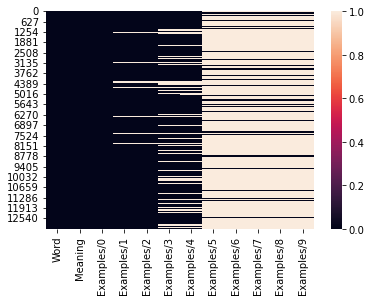

In [5]:
import seaborn as sns
sns.heatmap(df2.isnull())

In [6]:
!pip install missingno

<AxesSubplot:>

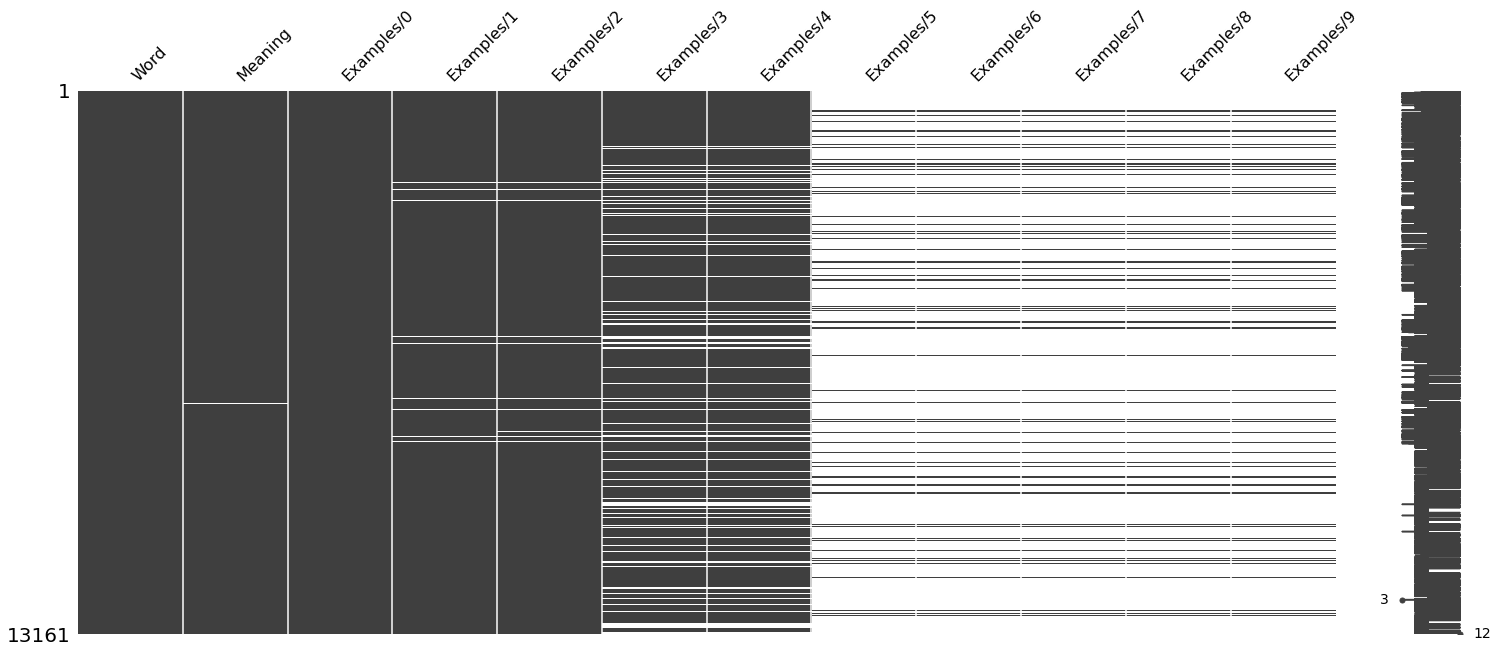

In [7]:
import missingno as msno
msno.matrix(df2)

<AxesSubplot:>

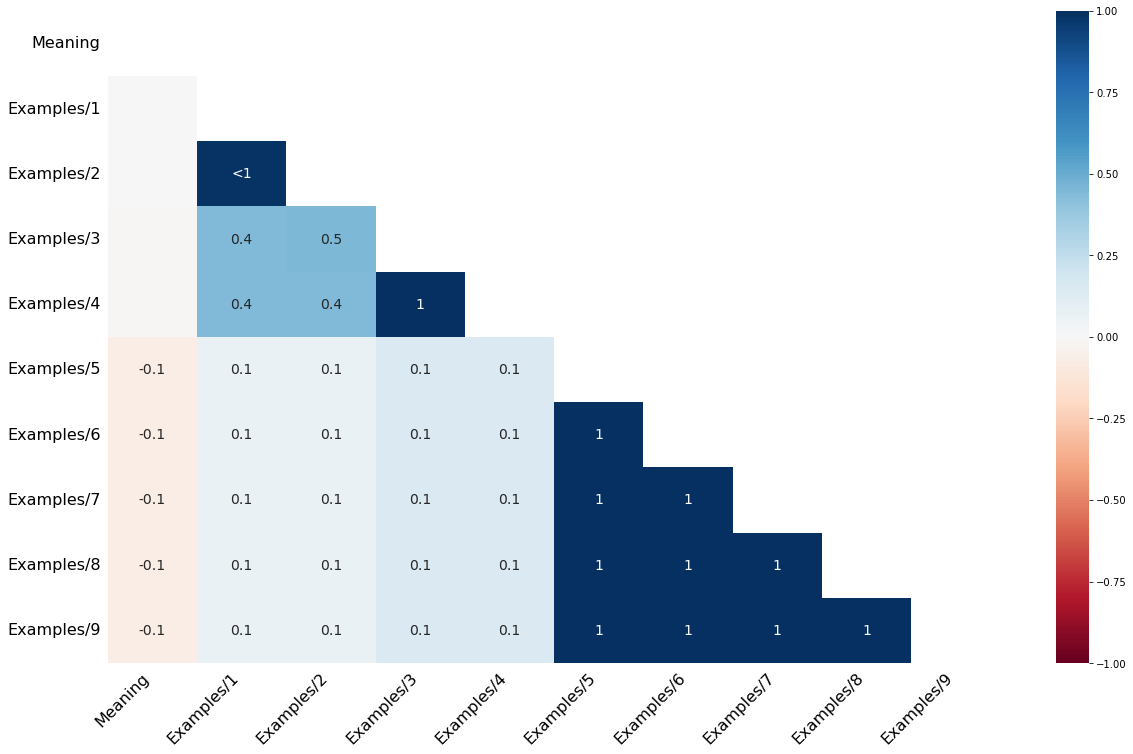

In [8]:
msno.heatmap(df2)

In [9]:
df1.head(100)

,word,count
0,the,125971793511
1,of,77466218166
2,and,55607010885
3,to,46622823631
4,in,40069476427
...,...,...
95,me,1567968527
96,between,1545114434
97,those,1532715465
98,same,1530696473


In [10]:
df2.head(20)

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9
0,A bed of roses,a phrase used to reference a situation that is...,The poor orphan’s life hasn’t been a bed of ro...,"Because Mark studied for many weeks, taking th...",The stressed business owner quickly realized t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Priori,something that is believed to be true without ...,Religious people have the a priori belief that...,The jaded woman made a priori assumptions that...,Christopher Columbus had the a priori belief t...,People make a priori assumptions that the sun ...,Lawyers use a priori arguments about their def...,NaN,NaN,NaN,NaN,NaN
2,Aardvark,"a large, long-eared nocturnal animal that uses...",The long-eared aardvark slept all day and ate ...,"With its rabbit like ears and piglike snout, t...","Living a solitary nightlife, the African aardv...",The aardvark is a snouty mammal that dines hea...,"Though it is a small mammal, the closest relat...",NaN,NaN,NaN,NaN,NaN
3,Aback,in amazement; shocked,I was taken aback by the server’s rude comment...,"While Amy enjoyed the film as a whole, as a mi...",Ken believed he had a great marriage so he was...,"At seventy years of age, Wanda was taken aback...",Although I had been exercising daily and eatin...,NaN,NaN,NaN,NaN,NaN
4,Abaft,toward the stern; behind,The wind was abaft which made the ship glide f...,They placed the lifeboats in the rear part of ...,My first sailing lesson was learning that abaf...,"The sea spray was coming from abaft, making my...",I was told to sit abaft to lessen my seasickne...,NaN,NaN,NaN,NaN,NaN
5,Abandon,to stop caring and leave or to desert,Since the young girl was unable to care for th...,Carl rarely commits to anything so everyone ex...,"During the snow storm, many people made the de...",The military police is currently looking for t...,"Because this plan is not feasible, we need to ...",NaN,NaN,NaN,NaN,NaN
6,Abase,to lower so as to hurt feelings,My stepmother is an evil woman who likes to ab...,"Because Mark hated himself, he often tried to ...",I will not remain married to a man who tries t...,"Although I need money badly, I will not abase ...",My jealous sister tried to abase me by making ...,"When my brother behaved badly, my mother would...",The gossip columnist tried to abase the singer...,Even though John was angry at his wife for los...,"Although Alice bullies smaller kids at school,...",I could not hold my tongue when the snobby cus...
7,Abaser,someone who degrades or lowers someone,After the abaser would make fun of her daughte...,When everyone in the grocery store heard the a...,Even the abaser couldn’t think of something me...,People who have low self-esteem will likely be...,Usually the classmates would avoid the abaser ...,NaN,NaN,NaN,NaN,NaN
8,Abash,to humiliate someone and make them feel embarr...,"The officer tried to abash the inmates, humili...",Daniel’s tendency to abash his wife left her e...,Though he claims he didn’t mean to abash his b...,Ross vowed to humiliate his opponent and abash...,"Because he doesn’t have any empathy, the evil ...",NaN,NaN,NaN,NaN,NaN
9,Abate,to reduce in degree or intensity,I hope this medicine will abate the pain in my...,"In time, his anger will abate, and he will for...","With any luck, the storm will abate soon so we...",The firemen sprayed water on the burning house...,"After my massage, I felt my stress level abate...",Even though the unemployment rate continues to...,Because the paparazzi kept following the celeb...,I married my husband because I know my love fo...,"By adding an extra lane to the highway, we can...",The diet pill is supposed to abate my appetite.


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13161 entries, 0 to 13160
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Word        13161 non-null  object
 1   Meaning     13145 non-null  object
 2   Examples/0  13161 non-null  object
 3   Examples/1  12786 non-null  object
 4   Examples/2  12779 non-null  object
 5   Examples/3  11440 non-null  object
 6   Examples/4  11428 non-null  object
 7   Examples/5  1686 non-null   object
 8   Examples/6  1686 non-null   object
 9   Examples/7  1686 non-null   object
 10  Examples/8  1686 non-null   object
 11  Examples/9  1682 non-null   object
dtypes: object(12)
memory usage: 1.2+ MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313282 entries, 0 to 313281
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    313280 non-null  object
 1   count   313282 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ MB


### Process Steps

#### Cleaning data and correct the data formats

In [13]:
# import pyplot and seaborn libraries
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

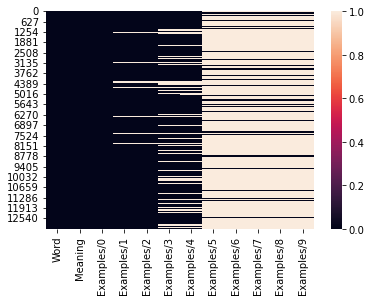

In [14]:
# the best way to find null values
sns.heatmap(data=df2.isnull())

In [15]:
df2.isnull().sum()

Word              0
Meaning          16
Examples/0        0
Examples/1      375
Examples/2      382
Examples/3     1721
Examples/4     1733
Examples/5    11475
Examples/6    11475
Examples/7    11475
Examples/8    11475
Examples/9    11479
dtype: int64

In [16]:
# Lower strings in Word column
df2['Word']=df2['Word'].str.lower()

In [17]:
df2[df2['Word'].str.contains('a ')]

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9
0,a bed of roses,a phrase used to reference a situation that is...,The poor orphan’s life hasn’t been a bed of ro...,"Because Mark studied for many weeks, taking th...",The stressed business owner quickly realized t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a priori,something that is believed to be true without ...,Religious people have the a priori belief that...,The jaded woman made a priori assumptions that...,Christopher Columbus had the a priori belief t...,People make a priori assumptions that the sun ...,Lawyers use a priori arguments about their def...,NaN,NaN,NaN,NaN,NaN
372,aha moment,a moment of sudden insight,The scientist had an aha moment and figured ou...,"Even though the breakup was painful, it was an...","While working on the difficult math problem, t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,alma mater,the school or college that one attended,"My mother wanted me to go to her alma mater, b...",Cole and every male graduate in his family are...,"Because my alma mater will give me a discount,...",The high school senior hoped to work for his a...,"Honored to teach at the college he attended, P...",NaN,NaN,NaN,NaN,NaN
813,as timid as a mouse,describes someone that is easily frightened or...,Charlotte has always been someone that was as ...,Most young children are extremely outgoing and...,Someone who is as timid as a mouse is likely s...,If you have a friend that is as timid as a mou...,"I used to be as timid as a mouse, but as I got...",NaN,NaN,NaN,NaN,NaN
952,aura,a unique sensation or feeling that stems from ...,The angel’s aura made me feel calm and hopeful.,Because Jim has an aura of negativity surround...,Gina uses a large number of herbal oils to spr...,"As I stepped inside the temple, I was embraced...","Under the spotlight, the star’s aura seemed ev...",NaN,NaN,NaN,NaN,NaN
999,aura,a unique sensation or feeling that stems from ...,The angel’s aura made me feel calm and hopeful.,Because Jim has an aura of negativity surround...,Gina uses a large number of herbal oils to spr...,"As I stepped inside the temple, I was embraced...","Under the spotlight, the star’s aura seemed ev...",NaN,NaN,NaN,NaN,NaN
1452,bona fide,real or done honestly,The jeweler stated the large diamond was bona ...,Because the man had lied about having a medica...,"To make sure you are a bona fide buyer, the re...","Unlike the sneaky man at the pawn shop, the ba...","When she married the prince, the commoner beca...",The results of the test were not bona fide bec...,"Before I decide to buy your company, I will ha...",These strategies have been shown to be bona fi...,It is obvious from the number of music downloa...,In order to receive a refund for your missing ...
1453,bonanza,a large amount of a thing that is viewed as de...,"Once I was a lonely girl, but social media has...",Valentine’s Day produces a bonanza of wealth f...,"Because football is extremely popular, the Sup...",The reality star knows posting a nude selfie w...,Although we received a bonanza of donations fo...,NaN,NaN,NaN,NaN,NaN
5675,iota,a tiny amount,"If there is even one iota of doubt, the jury s...",My father says his love for my mother has not ...,Although the suspect said he was out of town a...,"As a starving writer, all I need is for one pu...",Since Janet had repeatedly warned her son to s...,NaN,NaN,NaN,NaN,NaN


In [18]:
# Check again
df1.head(100)

,word,count
0,the,125971793511
1,of,77466218166
2,and,55607010885
3,to,46622823631
4,in,40069476427
...,...,...
95,me,1567968527
96,between,1545114434
97,those,1532715465
98,same,1530696473


In [19]:
# drop 50 initial words 
df1=df1.drop(df1.index[:50]).reset_index(drop=True)

In [20]:
# Create the copies of two tables
df1_copy =df1.copy()
df2_copy = df2.copy()

In [21]:
# Check the string values in Word columns, then figured out the spacings in the values. Removing them
df2_copy['Word']=df2_copy['Word'].apply(lambda x: x.replace(' ',''))

In [22]:
# Remove duplicates
df2_copy=df2_copy.drop_duplicates()

In [23]:
df2_copy

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9
0,abedofroses,a phrase used to reference a situation that is...,The poor orphan’s life hasn’t been a bed of ro...,"Because Mark studied for many weeks, taking th...",The stressed business owner quickly realized t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,apriori,something that is believed to be true without ...,Religious people have the a priori belief that...,The jaded woman made a priori assumptions that...,Christopher Columbus had the a priori belief t...,People make a priori assumptions that the sun ...,Lawyers use a priori arguments about their def...,NaN,NaN,NaN,NaN,NaN
2,aardvark,"a large, long-eared nocturnal animal that uses...",The long-eared aardvark slept all day and ate ...,"With its rabbit like ears and piglike snout, t...","Living a solitary nightlife, the African aardv...",The aardvark is a snouty mammal that dines hea...,"Though it is a small mammal, the closest relat...",NaN,NaN,NaN,NaN,NaN
3,aback,in amazement; shocked,I was taken aback by the server’s rude comment...,"While Amy enjoyed the film as a whole, as a mi...",Ken believed he had a great marriage so he was...,"At seventy years of age, Wanda was taken aback...",Although I had been exercising daily and eatin...,NaN,NaN,NaN,NaN,NaN
4,abaft,toward the stern; behind,The wind was abaft which made the ship glide f...,They placed the lifeboats in the rear part of ...,My first sailing lesson was learning that abaf...,"The sea spray was coming from abaft, making my...",I was told to sit abaft to lessen my seasickne...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13156,zodiac,"a divided band in sky along which the sun, the...",Twelve cities in the state were named after as...,The zodiac signs are split over the twelve mon...,Zodiac symbols are based on the constellations...,Each of the zodiac signs covers an equal area ...,"The zodiac system was based off of the sun, mo...",NaN,NaN,NaN,NaN,NaN
13157,zone,an area or division,The zone only has houses and no stores or shop...,Walmart workers will place cleaning supplies i...,"Before the team warmed up, all of the player’s...","Because they live in a quake zone, the couple ...",People must drive slower in the construction z...,NaN,NaN,NaN,NaN,NaN
13158,zoology,that portion of science that deals with the an...,Since Chamberlain had a fierce love for animal...,April used her zoology degree to help ranchers...,"Through the school’s zoology program, students...",Kids learn about all types of animals when stu...,"In order to earn her degree in zoology, Rhonda...",NaN,NaN,NaN,NaN,NaN
13159,zoom,to move very quickly,"The cars began to zoom around the racetrack, m...",Police will need to monitor the fast-moving ca...,"Reading eagerly, the avid reader can zoom thro...",Hurried shoppers looking for Christmas present...,The track star was able to zoom past all of th...,NaN,NaN,NaN,NaN,NaN


In [24]:
df_merge= df2_copy.merge(df1_copy, left_on='Word', right_on ='word', how='left')

In [25]:
df_merge

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9,word,count
0,abedofroses,a phrase used to reference a situation that is...,The poor orphan’s life hasn’t been a bed of ro...,"Because Mark studied for many weeks, taking th...",The stressed business owner quickly realized t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,apriori,something that is believed to be true without ...,Religious people have the a priori belief that...,The jaded woman made a priori assumptions that...,Christopher Columbus had the a priori belief t...,People make a priori assumptions that the sun ...,Lawyers use a priori arguments about their def...,NaN,NaN,NaN,NaN,NaN,apriori,176412.0
2,aardvark,"a large, long-eared nocturnal animal that uses...",The long-eared aardvark slept all day and ate ...,"With its rabbit like ears and piglike snout, t...","Living a solitary nightlife, the African aardv...",The aardvark is a snouty mammal that dines hea...,"Though it is a small mammal, the closest relat...",NaN,NaN,NaN,NaN,NaN,aardvark,142517.0
3,aback,in amazement; shocked,I was taken aback by the server’s rude comment...,"While Amy enjoyed the film as a whole, as a mi...",Ken believed he had a great marriage so he was...,"At seventy years of age, Wanda was taken aback...",Although I had been exercising daily and eatin...,NaN,NaN,NaN,NaN,NaN,aback,1722244.0
4,abaft,toward the stern; behind,The wind was abaft which made the ship glide f...,They placed the lifeboats in the rear part of ...,My first sailing lesson was learning that abaf...,"The sea spray was coming from abaft, making my...",I was told to sit abaft to lessen my seasickne...,NaN,NaN,NaN,NaN,NaN,abaft,454716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13097,zodiac,"a divided band in sky along which the sun, the...",Twelve cities in the state were named after as...,The zodiac signs are split over the twelve mon...,Zodiac symbols are based on the constellations...,Each of the zodiac signs covers an equal area ...,"The zodiac system was based off of the sun, mo...",NaN,NaN,NaN,NaN,NaN,zodiac,1572535.0
13098,zone,an area or division,The zone only has houses and no stores or shop...,Walmart workers will place cleaning supplies i...,"Before the team warmed up, all of the player’s...","Because they live in a quake zone, the couple ...",People must drive slower in the construction z...,NaN,NaN,NaN,NaN,NaN,zone,108805221.0
13099,zoology,that portion of science that deals with the an...,Since Chamberlain had a fierce love for animal...,April used her zoology degree to help ranchers...,"Through the school’s zoology program, students...",Kids learn about all types of animals when stu...,"In order to earn her degree in zoology, Rhonda...",NaN,NaN,NaN,NaN,NaN,zoology,9384658.0
13100,zoom,to move very quickly,"The cars began to zoom around the racetrack, m...",Police will need to monitor the fast-moving ca...,"Reading eagerly, the avid reader can zoom thro...",Hurried shoppers looking for Christmas present...,The track star was able to zoom past all of th...,NaN,NaN,NaN,NaN,NaN,zoom,3531423.0


In [26]:
# order data
df_merge.sort_values(by=['Word','count'], ascending =[True,False])

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9,word,count
2,aardvark,"a large, long-eared nocturnal animal that uses...",The long-eared aardvark slept all day and ate ...,"With its rabbit like ears and piglike snout, t...","Living a solitary nightlife, the African aardv...",The aardvark is a snouty mammal that dines hea...,"Though it is a small mammal, the closest relat...",NaN,NaN,NaN,NaN,NaN,aardvark,142517.0
3,aback,in amazement; shocked,I was taken aback by the server’s rude comment...,"While Amy enjoyed the film as a whole, as a mi...",Ken believed he had a great marriage so he was...,"At seventy years of age, Wanda was taken aback...",Although I had been exercising daily and eatin...,NaN,NaN,NaN,NaN,NaN,aback,1722244.0
4,abaft,toward the stern; behind,The wind was abaft which made the ship glide f...,They placed the lifeboats in the rear part of ...,My first sailing lesson was learning that abaf...,"The sea spray was coming from abaft, making my...",I was told to sit abaft to lessen my seasickne...,NaN,NaN,NaN,NaN,NaN,abaft,454716.0
5,abandon,to stop caring and leave or to desert,Since the young girl was unable to care for th...,Carl rarely commits to anything so everyone ex...,"During the snow storm, many people made the de...",The military police is currently looking for t...,"Because this plan is not feasible, we need to ...",NaN,NaN,NaN,NaN,NaN,abandon,21065505.0
6,abase,to lower so as to hurt feelings,My stepmother is an evil woman who likes to ab...,"Because Mark hated himself, he often tried to ...",I will not remain married to a man who tries t...,"Although I need money badly, I will not abase ...",My jealous sister tried to abase me by making ...,"When my brother behaved badly, my mother would...",The gossip columnist tried to abase the singer...,Even though John was angry at his wife for los...,"Although Alice bullies smaller kids at school,...",I could not hold my tongue when the snobby cus...,abase,203027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13097,zodiac,"a divided band in sky along which the sun, the...",Twelve cities in the state were named after as...,The zodiac signs are split over the twelve mon...,Zodiac symbols are based on the constellations...,Each of the zodiac signs covers an equal area ...,"The zodiac system was based off of the sun, mo...",NaN,NaN,NaN,NaN,NaN,zodiac,1572535.0
13098,zone,an area or division,The zone only has houses and no stores or shop...,Walmart workers will place cleaning supplies i...,"Before the team warmed up, all of the player’s...","Because they live in a quake zone, the couple ...",People must drive slower in the construction z...,NaN,NaN,NaN,NaN,NaN,zone,108805221.0
13099,zoology,that portion of science that deals with the an...,Since Chamberlain had a fierce love for animal...,April used her zoology degree to help ranchers...,"Through the school’s zoology program, students...",Kids learn about all types of animals when stu...,"In order to earn her degree in zoology, Rhonda...",NaN,NaN,NaN,NaN,NaN,zoology,9384658.0
13100,zoom,to move very quickly,"The cars began to zoom around the racetrack, m...",Police will need to monitor the fast-moving ca...,"Reading eagerly, the avid reader can zoom thro...",Hurried shoppers looking for Christmas present...,The track star was able to zoom past all of th...,NaN,NaN,NaN,NaN,NaN,zoom,3531423.0


<AxesSubplot:>

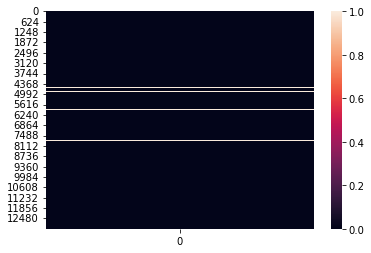

In [27]:
# Check the N/A values of count column
sns.heatmap(data=df_merge['count'].isna().values.reshape(-1, 1))

In [28]:
df_merge['count'] =df_merge['count'].dropna()

<AxesSubplot:>

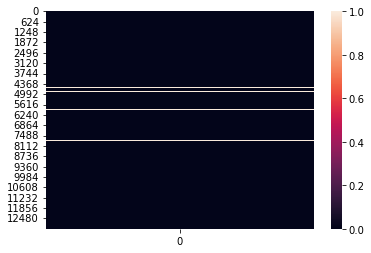

In [29]:
sns.heatmap(data=df_merge['count'].isna().values.reshape(-1, 1))

In [30]:
# drop na values only consider the 'count' column to determine which rows to drop.
df_merge.dropna(subset=['count'], inplace=True)

In [31]:
df_merge.sort_values(by=['count','Word'], ascending =[False,True])

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9,word,count
5672,its,related to something that was mentioned previo...,"After three days, the sick dog was allowed to ...",The store closed its doors when business came ...,The charity will have to stop its community pr...,The dog took its bone to its favorite burial s...,"During Spring Break, the normally quiet town w...",NaN,NaN,NaN,NaN,NaN,its,3.160954e+09
11653,time,the juncture or point at which an event takes ...,"When the bell rang, it was time to say good-by...","Due to the low pay, decrease in hours and lack...","“It’s time to make the doughnuts,” said the Du...","With a growling stomach, the boy knew it was t...","After dating his girlfriend for three years, t...",NaN,NaN,NaN,NaN,NaN,time,2.844215e+09
10769,state,"to say something, either out loud or on paper",Eli will state his case to the judge in the mo...,The customer decided to state his complaint in...,"Speaking to the witness, the judge asked the w...","While writing her research paper, the student ...",The job application asks the person looking fo...,NaN,NaN,NaN,NaN,NaN,state,2.349553e+09
10770,state,the current condition that someone or somethin...,Mary hasn’t been in a very good mental state s...,Our state of economic affairs is rather poor r...,"The nation is in a state of war right now, mas...","My state of dress is usually quite casual, but...","The city is in a state of emergency, knowing f...",NaN,NaN,NaN,NaN,NaN,state,2.349553e+09
10771,state,the condition or status of an object or situation,The landlord’s last tenants left his rental ho...,"Because the antique is in a spotless state, th...",The customer called the company to check on th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,state,2.349553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11435,telegnosis,knowledge of events acquired from supernatural...,The psychic must have used telegnosis to read ...,Anyone that claims to read the future also cla...,Some people think an Ouija board can give them...,If you learned something about the future thro...,Because no normal human can learn of things th...,NaN,NaN,NaN,NaN,NaN,telegnosis,7.050000e+02
5090,impavid,extreme courage or bravery,Mongols were impavid warriors who rode into da...,Impavid vacationers dare to swim with sharks w...,Only the impavid would choose to jump from an ...,"The student wished she was impavid, but truthf...",Ancient Roman gladiators had to be impavid bec...,NaN,NaN,NaN,NaN,NaN,impavid,6.870000e+02
12046,ultracrepidarian,a person who acts like an expert but rarely kn...,The ultracrepidarian talked about physics as i...,Every university class has an ultracrepidarian...,Bruce knew that the ultracrepidarian liked to ...,Shane was the ultracrepidarian of the family w...,Briana was an ultracrepidarian who acted like ...,NaN,NaN,NaN,NaN,NaN,ultracrepidarian,4.370000e+02
12006,turophile,a person who loves cheese,"As a connoisseur of fancy cheese, the turophil...",James is a turophile of sorts and enjoys chees...,"Brie, pepper jack, and mozzarella are some of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,turophile,3.270000e+02


In [32]:
df_merge = df_merge.sort_values(by='count', ascending =False)

In [33]:
# Use syllapy to classify words into syllable groups
import syllapy

In [34]:
# apply to Word column
df_merge['syllables']= df_merge['Word'].apply(lambda x: syllapy.count(x))

In [35]:
# Examine the result, These words below are correctly clasified 
df_merge[df_merge['syllables']==4]

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,Examples/6,Examples/7,Examples/8,Examples/9,word,count,syllables
6967,necessary,being required or vital,"For the chocolate cake, the necessary ingredie...","In order to climb the highest mountain, the cl...",Cancer patients must undergo the necessary che...,"Since we lived in a bad area of town, we took ...","After writing my sentences, I placed the neces...",NaN,NaN,NaN,NaN,NaN,necessary,604564556.0,4
6784,necessary,being required or vital,"For the chocolate cake, the necessary ingredie...","In order to climb the highest mountain, the cl...",Cancer patients must undergo the necessary che...,"Since we lived in a bad area of town, we took ...","After writing my sentences, I placed the neces...",NaN,NaN,NaN,NaN,NaN,necessary,604564556.0,4
985,available,accessible and obtainable,When my dream house was put on the market and ...,"Since the game was available on the app store,...","Once the employee left the firm, his job becam...","Due to having no events to attend this week, t...","“If you are available on Friday,” the mother a...",NaN,NaN,NaN,NaN,NaN,available,596677049.0,4
9895,secretary,"an office assistant, usually in charge of records",Trying to impress the new secretary caused the...,"With no secretary to organize his paperwork, t...",The doctor’s secretary had a knack for efficie...,Hiring his wife as a secretary seemed like a m...,Prematurely firing the office secretary proved...,NaN,NaN,NaN,NaN,NaN,secretary,500038426.0,4
10426,society,an organized group of people,Homeowners contested that the property tax was...,"The school society was made up of teachers, pa...",Western society generally holds that polygamy ...,Reintegrating felons into general society is o...,Ordinary people struggle to find their place i...,NaN,NaN,NaN,NaN,NaN,society,480571113.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,obnubilate,to obscure or darken something,"If a cloud passes in front of the sun, it will...",I find it difficult to sleep when there is too...,Sunglasses are one of the most common tools us...,Some people use tinted windows to obnubilate t...,The best way to obnubilate someone’s vision is...,NaN,NaN,NaN,NaN,NaN,obnubilate,1716.0,4
10482,somnambulate,to walk while sleeping,The sleep therapist was studying patients who ...,The parents stayed up all night to make sure t...,"In order to somnambulate, one needs to be asleep.","Because he continued to somnambulate, they wan...",He would always end up outside during a somnam...,NaN,NaN,NaN,NaN,NaN,somnambulate,1649.0,4
379,ailurophile,a person who loves cats,The neighborhood children only saw the ailurop...,"Although she does love cats, the ailurophile d...","The ailurophile loves cats more than people, s...",Linda is a well-known ailurophile who has a fe...,Ann isn’t a dog person but an ailurophile whos...,NaN,NaN,NaN,NaN,NaN,ailurophile,1597.0,4
1628,callipygous,having a proportionate and well-shaped rear end,The callipygous girls in the videos were hired...,"Showing off her callipygous figure, the dancer...","Having a pear-shaped body, the callipygous mod...","Because of her callipygous body-style, it is h...",The callipygous stripper got lots of attention...,NaN,NaN,NaN,NaN,NaN,callipygous,1518.0,4


<AxesSubplot:>

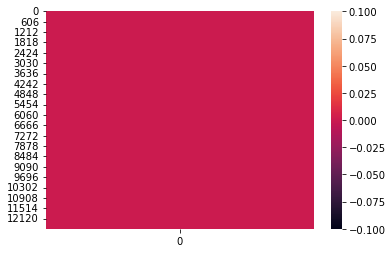

In [36]:
# Check N/A values. There is no N/A. 
sns.heatmap(df_merge['Word'].isna().values.reshape(-1, 1))

In [37]:
# Drop these column because of useless
df_merge = df_merge.drop(['Examples/6','Examples/7','Examples/8','Examples/9'], axis=1)

In [38]:
# drop word column
df_merge = df_merge.drop('word', axis=1)

In [39]:
df = df_merge.groupby('syllables')

In [40]:
# Sum the frequency of each syllable group
sum_df = df.sum()
print(sum_df)

                  count
syllables              
1          1.357716e+11
2          1.469363e+11
3          9.142936e+10
4          4.037981e+10
5          1.032895e+10
6          6.671753e+08
7          1.384702e+06


df_merge.sort_values(by=['syllables','count'], ascending =[True,False])

### Data Visualization

Text(0, 0.5, 'Frequency')

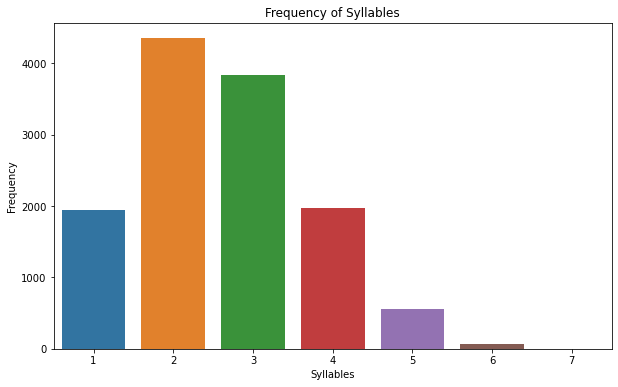

In [41]:
# Plot a number words by syllables chart
plt.figure(figsize=(10, 6))
sns.barplot(x=df_merge['syllables'].value_counts().index, 
            y=df_merge['syllables'].value_counts())
plt.title('Frequency of Syllables')
plt.xlabel('Syllables')
plt.ylabel('Frequency')

In [42]:
# The frequency of each syllable group
df_merge['syllables'].value_counts()

2    4349
3    3831
4    1969
1    1941
5     560
6      64
7       3
Name: syllables, dtype: int64

In [43]:
sum_counts = df_merge.groupby('syllables')['count'].sum()
print("Sum of counts for each syllable:")
print(sum_counts)

Sum of counts for each syllable:
syllables
1    1.357716e+11
2    1.469363e+11
3    9.142936e+10
4    4.037981e+10
5    1.032895e+10
6    6.671753e+08
7    1.384702e+06
Name: count, dtype: float64


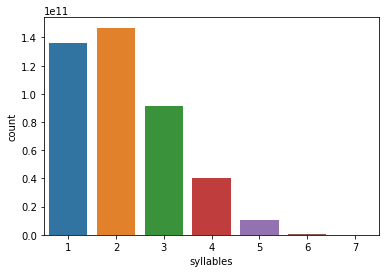

In [44]:
# Frequency of Words by Syllables in Use
# The words with the most frequency are the ones with two syllables.
sorted_df = df_merge.groupby('syllables')['count'].sum().reset_index().sort_values(by='count', ascending=False)

# Plot the data
sns.barplot(x='syllables', y='count', data=sorted_df)

# Show the plot
plt.show()

In [45]:
import nltk
from nltk.tokenize import word_tokenize

In [46]:
# Function to categorize words based on part of speech
def categorize_pos(word):
    pos_tag = nltk.pos_tag([word])[0][1]
    if pos_tag.startswith('N'):
        return 'N'
    elif pos_tag.startswith('J'):
        return 'Adj'
    elif pos_tag.startswith('V'):
        return 'V'
    elif pos_tag.startswith('R'):
        return 'Adv'
    elif pos_tag.startswith('WDT'):
        return 'wh-determiner'
    elif pos_tag.startswith('MD'):
        return 'modal'
    elif pos_tag.startswith('CC'):
        return 'CC'
    elif pos_tag.startswith('PRP$'):
        return 'PRP'
    elif pos_tag.startswith('WRB'):
        return 'Wh-adverb'       
    else:
        return 'other'

# Assuming df is your DataFrame and 'words' is the column containing the words
df_merge['pos_category'] = df_merge['Word'].apply(categorize_pos)




In [47]:
df_merge.sort_values(by=['syllables','count','pos_category'], ascending =[True, False, True])

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,count,syllables,pos_category
5672,its,related to something that was mentioned previo...,"After three days, the sick dog was allowed to ...",The store closed its doors when business came ...,The charity will have to stop its community pr...,The dog took its bone to its favorite burial s...,"During Spring Break, the normally quiet town w...",NaN,3.160954e+09,1,PRP
11653,time,the juncture or point at which an event takes ...,"When the bell rang, it was time to say good-by...","Due to the low pay, decrease in hours and lack...","“It’s time to make the doughnuts,” said the Du...","With a growling stomach, the boy knew it was t...","After dating his girlfriend for three years, t...",NaN,2.844215e+09,1,N
10771,state,the condition or status of an object or situation,The landlord’s last tenants left his rental ho...,"Because the antique is in a spotless state, th...",The customer called the company to check on th...,NaN,NaN,NaN,2.349553e+09,1,N
10769,state,"to say something, either out loud or on paper",Eli will state his case to the judge in the mo...,The customer decided to state his complaint in...,"Speaking to the witness, the judge asked the w...","While writing her research paper, the student ...",The job application asks the person looking fo...,NaN,2.349553e+09,1,N
10770,state,the current condition that someone or somethin...,Mary hasn’t been in a very good mental state s...,Our state of economic affairs is rather poor r...,"The nation is in a state of war right now, mas...","My state of dress is usually quite casual, but...","The city is in a state of emergency, knowing f...",NaN,2.349553e+09,1,N
...,...,...,...,...,...,...,...,...,...,...,...
11669,tintinnabulation,a ringing or tinkling sound,You are more likely to hear tintinnabulation a...,The sound a wind chime makes is akin to a tint...,One might not consider a triangle as a legitim...,Instruments that create the sound of tintinnab...,"I am not a fan of tintinnabulation, which is w...",NaN,2.454700e+04,6,N
12046,ultracrepidarian,a person who acts like an expert but rarely kn...,The ultracrepidarian talked about physics as i...,Every university class has an ultracrepidarian...,Bruce knew that the ultracrepidarian liked to ...,Shane was the ultracrepidarian of the family w...,Briana was an ultracrepidarian who acted like ...,NaN,4.370000e+02,6,Adj
2067,collaboratively,in a way that involves two or more people work...,"Working collaboratively, the two musicians wer...","During the group assignment, several students ...",The staff worked collaboratively to create a c...,NaN,NaN,NaN,8.923880e+05,7,Adv
12141,undesirability,the quality of being unwanted or desired,The product’s undesirability caused it to sit ...,The rain coats’ undesirability is based on loc...,Looking for a way to rid herself of her undesi...,The southern chef was surprised by the undesir...,"Because he was so ugly, the dog’s undesirabili...",NaN,3.499950e+05,7,N


<AxesSubplot:xlabel='pos_category', ylabel='Count'>

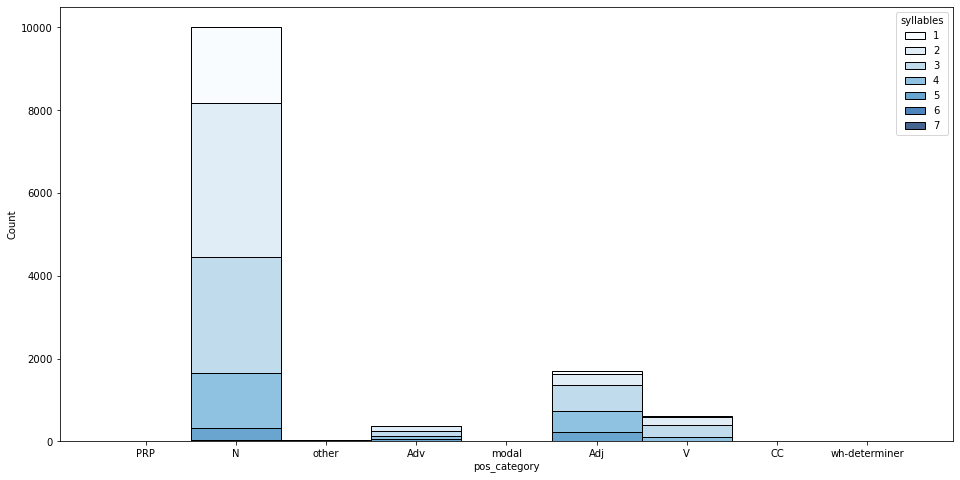

In [48]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_merge, x='pos_category', hue='syllables', multiple="stack", palette='Blues')

<AxesSubplot:xlabel='syllables', ylabel='pos_category'>

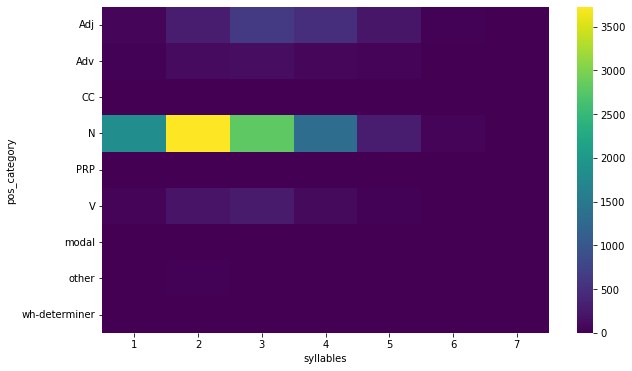

In [49]:
# unstack() method reshapes the Series with a multi-level index into a DataFrame.
# transform the type of data
# The size() method counts the number of rows in each group created by groupby.
heatmap_data = df_merge.groupby(['pos_category', 'syllables']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='viridis')

In [50]:
# Ranking the words by their count
df_merge['rank'] = df_merge['count'].rank(ascending=False)

In [51]:
df_merge['rank'] = df_merge['rank'].astype(int)

In [52]:
df_merge

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,count,syllables,pos_category,rank
5672,its,related to something that was mentioned previo...,"After three days, the sick dog was allowed to ...",The store closed its doors when business came ...,The charity will have to stop its community pr...,The dog took its bone to its favorite burial s...,"During Spring Break, the normally quiet town w...",NaN,3.160954e+09,1,PRP,1
11653,time,the juncture or point at which an event takes ...,"When the bell rang, it was time to say good-by...","Due to the low pay, decrease in hours and lack...","“It’s time to make the doughnuts,” said the Du...","With a growling stomach, the boy knew it was t...","After dating his girlfriend for three years, t...",NaN,2.844215e+09,1,N,2
10771,state,the condition or status of an object or situation,The landlord’s last tenants left his rental ho...,"Because the antique is in a spotless state, th...",The customer called the company to check on th...,NaN,NaN,NaN,2.349553e+09,1,N,4
10769,state,"to say something, either out loud or on paper",Eli will state his case to the judge in the mo...,The customer decided to state his complaint in...,"Speaking to the witness, the judge asked the w...","While writing her research paper, the student ...",The job application asks the person looking fo...,NaN,2.349553e+09,1,N,4
10770,state,the current condition that someone or somethin...,Mary hasn’t been in a very good mental state s...,Our state of economic affairs is rather poor r...,"The nation is in a state of war right now, mas...","My state of dress is usually quite casual, but...","The city is in a state of emergency, knowing f...",NaN,2.349553e+09,1,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11435,telegnosis,knowledge of events acquired from supernatural...,The psychic must have used telegnosis to read ...,Anyone that claims to read the future also cla...,Some people think an Ouija board can give them...,If you learned something about the future thro...,Because no normal human can learn of things th...,NaN,7.050000e+02,4,N,12713
5090,impavid,extreme courage or bravery,Mongols were impavid warriors who rode into da...,Impavid vacationers dare to swim with sharks w...,Only the impavid would choose to jump from an ...,"The student wished she was impavid, but truthf...",Ancient Roman gladiators had to be impavid bec...,NaN,6.870000e+02,3,N,12714
12046,ultracrepidarian,a person who acts like an expert but rarely kn...,The ultracrepidarian talked about physics as i...,Every university class has an ultracrepidarian...,Bruce knew that the ultracrepidarian liked to ...,Shane was the ultracrepidarian of the family w...,Briana was an ultracrepidarian who acted like ...,NaN,4.370000e+02,6,Adj,12715
12006,turophile,a person who loves cheese,"As a connoisseur of fancy cheese, the turophil...",James is a turophile of sorts and enjoys chees...,"Brie, pepper jack, and mozzarella are some of ...",NaN,NaN,NaN,3.270000e+02,3,N,12716


In [53]:
df_merge.columns

Index(['Word', 'Meaning', 'Examples/0', 'Examples/1', 'Examples/2',
       'Examples/3', 'Examples/4', 'Examples/5', 'count', 'syllables',
       'pos_category', 'rank'],
      dtype='object')

In [54]:
df_merge.head()

,Word,Meaning,Examples/0,Examples/1,Examples/2,Examples/3,Examples/4,Examples/5,count,syllables,pos_category,rank
5672,its,related to something that was mentioned previo...,"After three days, the sick dog was allowed to ...",The store closed its doors when business came ...,The charity will have to stop its community pr...,The dog took its bone to its favorite burial s...,"During Spring Break, the normally quiet town w...",NaN,3.160954e+09,1,PRP,1
11653,time,the juncture or point at which an event takes ...,"When the bell rang, it was time to say good-by...","Due to the low pay, decrease in hours and lack...","“It’s time to make the doughnuts,” said the Du...","With a growling stomach, the boy knew it was t...","After dating his girlfriend for three years, t...",NaN,2.844215e+09,1,N,2
10771,state,the condition or status of an object or situation,The landlord’s last tenants left his rental ho...,"Because the antique is in a spotless state, th...",The customer called the company to check on th...,NaN,NaN,NaN,2.349553e+09,1,N,4
10769,state,"to say something, either out loud or on paper",Eli will state his case to the judge in the mo...,The customer decided to state his complaint in...,"Speaking to the witness, the judge asked the w...","While writing her research paper, the student ...",The job application asks the person looking fo...,NaN,2.349553e+09,1,N,4
10770,state,the current condition that someone or somethin...,Mary hasn’t been in a very good mental state s...,Our state of economic affairs is rather poor r...,"The nation is in a state of war right now, mas...","My state of dress is usually quite casual, but...","The city is in a state of emergency, knowing f...",NaN,2.349553e+09,1,N,4


In [55]:
columns_name_reordered = ['rank', 'Word', 'pos_category','Meaning', 'Examples/0', 'Examples/1',
       'Examples/2', 'Examples/3', 'Examples/4', 'Examples/5', 'count',
       'syllables']

In [56]:
df_merge=df_merge[columns_name_reordered]

In [57]:
df_merge.columns

Index(['rank', 'Word', 'pos_category', 'Meaning', 'Examples/0', 'Examples/1',
       'Examples/2', 'Examples/3', 'Examples/4', 'Examples/5', 'count',
       'syllables'],
      dtype='object')

In [58]:
columns_renamed = ['Rank', 'Word', 'Lexical words', 'Meaning', 'Examples 1',
       'Examples 2', 'Examples 3', 'Examples 4', 'Examples 5', 'Examples 6',
       'Frequency', 'Syllables']

In [59]:
df_merge.columns = columns_renamed

In [60]:
df_merge=df_merge.sort_values(by=['Syllables','Rank','Lexical words'], ascending =[True, True, True])

In [61]:
df_merge=df_merge.drop(['Frequency','Examples 6'], axis=1)

In [62]:
df_merge

,Rank,Word,Lexical words,Meaning,Examples 1,Examples 2,Examples 3,Examples 4,Examples 5,Syllables
5672,1,its,PRP,related to something that was mentioned previo...,"After three days, the sick dog was allowed to ...",The store closed its doors when business came ...,The charity will have to stop its community pr...,The dog took its bone to its favorite burial s...,"During Spring Break, the normally quiet town w...",1
11653,2,time,N,the juncture or point at which an event takes ...,"When the bell rang, it was time to say good-by...","Due to the low pay, decrease in hours and lack...","“It’s time to make the doughnuts,” said the Du...","With a growling stomach, the boy knew it was t...","After dating his girlfriend for three years, t...",1
10771,4,state,N,the condition or status of an object or situation,The landlord’s last tenants left his rental ho...,"Because the antique is in a spotless state, th...",The customer called the company to check on th...,NaN,NaN,1
10769,4,state,N,"to say something, either out loud or on paper",Eli will state his case to the judge in the mo...,The customer decided to state his complaint in...,"Speaking to the witness, the judge asked the w...","While writing her research paper, the student ...",The job application asks the person looking fo...,1
10770,4,state,N,the current condition that someone or somethin...,Mary hasn’t been in a very good mental state s...,Our state of economic affairs is rather poor r...,"The nation is in a state of war right now, mas...","My state of dress is usually quite casual, but...","The city is in a state of emergency, knowing f...",1
...,...,...,...,...,...,...,...,...,...,...
11669,12548,tintinnabulation,N,a ringing or tinkling sound,You are more likely to hear tintinnabulation a...,The sound a wind chime makes is akin to a tint...,One might not consider a triangle as a legitim...,Instruments that create the sound of tintinnab...,"I am not a fan of tintinnabulation, which is w...",6
12046,12715,ultracrepidarian,Adj,a person who acts like an expert but rarely kn...,The ultracrepidarian talked about physics as i...,Every university class has an ultracrepidarian...,Bruce knew that the ultracrepidarian liked to ...,Shane was the ultracrepidarian of the family w...,Briana was an ultracrepidarian who acted like ...,6
2067,9766,collaboratively,Adv,in a way that involves two or more people work...,"Working collaboratively, the two musicians wer...","During the group assignment, several students ...",The staff worked collaboratively to create a c...,NaN,NaN,7
12141,11285,undesirability,N,the quality of being unwanted or desired,The product’s undesirability caused it to sit ...,The rain coats’ undesirability is based on loc...,Looking for a way to rid herself of her undesi...,The southern chef was surprised by the undesir...,"Because he was so ugly, the dog’s undesirabili...",7


In [63]:
import eng_to_ipa as p


In [64]:
df_merge=df_merge.drop('Phonetics', axis=1)

KeyError: "['Phonetics'] not found in axis"

In [ ]:
df_merge['Word'][11131][-1:]

In [ ]:
def change(word):
    ipa = p.convert(word)
    if ipa[-1:]!= "*":
        return ipa
    else:
        return "unknown"

df_merge['Phonetics'] = df_merge['Word'].apply(change)   

In [ ]:
df_merge

In [ ]:
df_merge=df_merge[df_merge["Phonetics"] != "unknown"]

In [ ]:
## Find the most common range of eng

In [ ]:
df_common = df_merge.copy()

In [ ]:
df_common.sort_values("Rank" ,ascending = True)[:7000][df_common["Syllables"]==6]

In [ ]:
len(df_common.sort_values("Rank" ,ascending = True)[:000][df_common["Syllables"]==2])

In [ ]:
# Create a FacetGrid with Seaborn
g = sns.FacetGrid(df_common, col="Syllables")

# Map the histogram plot onto the grid
g.map(sns.histplot, "Rank", kde=True, bins=20)

In [ ]:
# Show in rank(0-400) how many values have syllables equal 1
df_common.sort_values("Rank" ,ascending = True)[:400][df_common["Syllables"]==1]

In [ ]:
# Show in from lists of Syllables having values =1, sorted by Rank and get 400 individuals
df_common[df_common["Syllables"]==1].sort_values("Rank" ,ascending = True)[:400]

In [ ]:
len(df_common.loc[(df_common["Rank"] <= 300) & (df_common["Syllables"] == 2), :].sort_values("Rank", ascending=True))

In [ ]:
df_common.to_csv(r'C:\Users\DELL\Desktop\Words(En) Project\edit_eng_words.csv')

In [ ]:
df_common = pd.read_csv(r'C:\Users\DELL\Desktop\Words(En) Project\edit_eng_words.csv')

In [ ]:
df_common

In [ ]:
one= len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 1), :].sort_values("Rank", ascending=True))
print(one)
two=len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 2), :].sort_values("Rank", ascending=True))
print(two)
three=len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 3), :].sort_values("Rank", ascending=True))
print(three)
four= len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 4), :].sort_values("Rank", ascending=True))
print(four)
five=len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 5), :].sort_values("Rank", ascending=True))
print(five)
six=len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == 6), :].sort_values("Rank", ascending=True))
print(six)

In [ ]:
counts = []
for syllable_count in range(1, 7):
    count = len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500) & (df_common["Syllables"] == syllable_count), :])
    counts.append(count)

syllable_counts = range(1, 7)
plt.bar(syllable_counts, counts)
plt.xlabel('Number of Syllables')
plt.ylabel('Count')
plt.title('Count of Words by Syllable Count')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions
filtered_df = df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500)]

# Create countplot
sns.countplot(x="Syllables", data=filtered_df)
plt.xlabel('Number of Syllables')
plt.ylabel('Count')
plt.title('Count of Words by Syllable Count')
plt.show()

In [ ]:
# Filter the DataFrame based on conditions
filtered_df = df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 4500)]

# Create countplot
ax = sns.countplot(x="Syllables", data=filtered_df)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.xlabel('Number of Syllables')
plt.ylabel('Count')
plt.title('Count of Words by Syllable Count')
plt.show()


In [ ]:

# Define the filter conditions
filter_conditions = [
    ("Rank 400-1000", (400 <= df_common["Rank"]) & (df_common["Rank"] <= 1000)),
    ("Rank 1001-2500", (1001 <= df_common["Rank"]) & (df_common["Rank"] <= 2500)),
    ("Rank 2501-4500", (2501 <= df_common["Rank"]) & (df_common["Rank"] <= 4500))
]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(filter_conditions), figsize=(15, 5))

# Plot countplots for each filter condition
for i, (title, condition) in enumerate(filter_conditions):
    filtered_df = df_common.loc[condition]
    ax = sns.countplot(x="Syllables", data=filtered_df, ax=axes[i])
    ax.set_title(title)
    ax.set_xlabel('Number of Syllables')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Define the filter conditions
filter_conditions = [
    ("Rank 400-3000", (400 <= df_common["Rank"]) & (df_common["Rank"] <= 3000)),
    ("Rank 3001-5500", (3001 <= df_common["Rank"]) & (df_common["Rank"] <= 5500)),
    ("Rank 5501-7000", (5501 <= df_common["Rank"]) & (df_common["Rank"] <= 7000))
]

# Create a new column to represent the rank range
for title, condition in filter_conditions:
    df_common.loc[condition, "Filter"] = title

# Create a FacetGrid with hue
g = sns.FacetGrid(df_common, col="Filter", hue="Filter", col_wrap=len(filter_conditions), sharey=False)

# Map countplot onto the grid
g.map(sns.countplot, "Syllables", order=[1, 2, 3, 4, 5, 6])

# Annotate each bar with its count
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

# Set labels
g.set_axis_labels("Number of Syllables", "Count")

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the filter conditions
filter_conditions = [
    ("Rank 400-3000", (400 <= df_common["Rank"]) & (df_common["Rank"] <= 5000)),
    ("Rank 3001-5500", (3001 <= df_common["Rank"]) & (df_common["Rank"] <= 7500)),
    ("Rank 5501-7000", (5501 <= df_common["Rank"]) & (df_common["Rank"] <= 7000)),
    ("Rank 7001-11000", (7001 <= df_common["Rank"]) & (df_common["Rank"] <= 11000))
]

# Create a new column to represent the rank range
for title, condition in filter_conditions:
    df_common.loc[condition, "Filter"] = title

# Create a FacetGrid with hue
g = sns.FacetGrid(df_common, col="Filter", col_wrap=len(filter_conditions), sharey=False)

# Map countplot onto the grid with custom color palette
g.map(sns.countplot, "Syllables", order=[1, 2, 3, 4, 5, 6], palette="husl")

# Annotate each bar with its count
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

# Set labels
g.set_axis_labels("Number of Syllables", "Count")

plt.tight_layout()
plt.show()

In [ ]:
for syllable_count in range(1, 7):
    count = len(df_common.loc[(400 <= df_common["Rank"]) & (df_common["Rank"] <= 5500) & (df_common["Syllables"] == syllable_count), :].sort_values("Rank", ascending=True))
    print(f"{syllable_count}: {count}")

In [ ]:
df_common[(df_common["Rank"]<=200) & (df_common["Syllables"]==1)]

In [ ]:
df_common.drop(df_common[(df_common["Rank"] <= 200) & (df_common["Syllables"] == 1)].index, inplace=True)

In [ ]:
df_common[:5000].drop_duplicates()

In [ ]:
df_common = pd.read_csv(r'C:\Users\DELL\Desktop\Words(En) Project\edit_eng_words.csv')

In [ ]:
df_common.drop

In [ ]:
df_common.drop(df_common[(df_common["Rank"] <= 200) & (df_common["Syllables"] == 1)].index, inplace=True)

In [ ]:
df_common = df_common.sort_values("Rank", ascending=True)

In [ ]:
df_common_cut = df_common[:5000]

In [ ]:
df_common_cut

In [ ]:
for syllable_count in range(1, 7):
    count = len(df_common_cut.loc[(400 <= df_common_cut["Rank"]) & (df_common_cut["Rank"] <= 4500) & (df_common_cut["Syllables"] == syllable_count), :])
    print(count)

In [ ]:
df_common_cut.to_csv(r'C:\Users\DELL\Desktop\Words(En) Project\new_cut_eng_words.csv')

In [ ]:
df_common_cut